In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb


In [2]:
#Load Data
df = pd.read_csv('C:\liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [4]:
print(df.describe())

             N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616 

In [5]:
print(df.isnull().sum())

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [6]:
print("\nClass Distribution:")
print(df['Stage'].value_counts())


Class Distribution:
Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64


In [7]:
df = df.drop(columns=['N_Days'], errors='ignore')
df

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [8]:
df['Age'].describe()

count    25000.000000
mean     18495.877080
std       3737.596616
min       9598.000000
25%      15694.000000
50%      18499.000000
75%      20955.000000
max      28650.000000
Name: Age, dtype: float64

In [9]:
print(df['Age'].head())

0    18499
1    19724
2    11839
3    16467
4    21699
Name: Age, dtype: int64


In [10]:
df['Age'] = df['Age']/365

In [11]:
#Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

label_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Status',]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [12]:
print(df.head())

   Status  Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0       0     1  50.682192    0        0             1        0      0   
1       0     1  54.038356    1        1             0        1      0   
2       0     1  32.435616    0        0             0        0      0   
3       2     1  45.115068    0        0             0        0      0   
4       2     1  59.449315    0        0             1        0      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220

<Axes: >

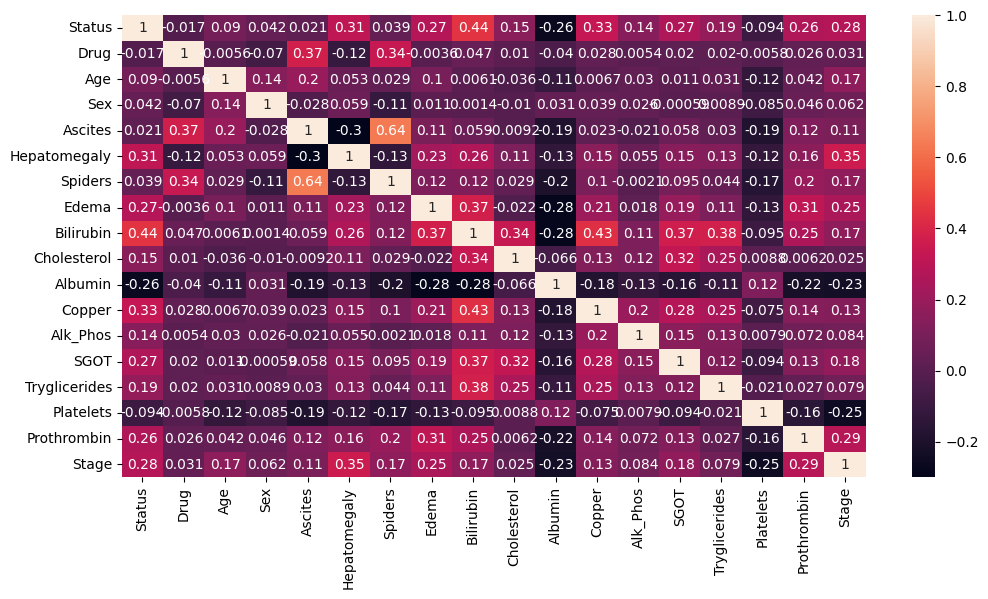

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

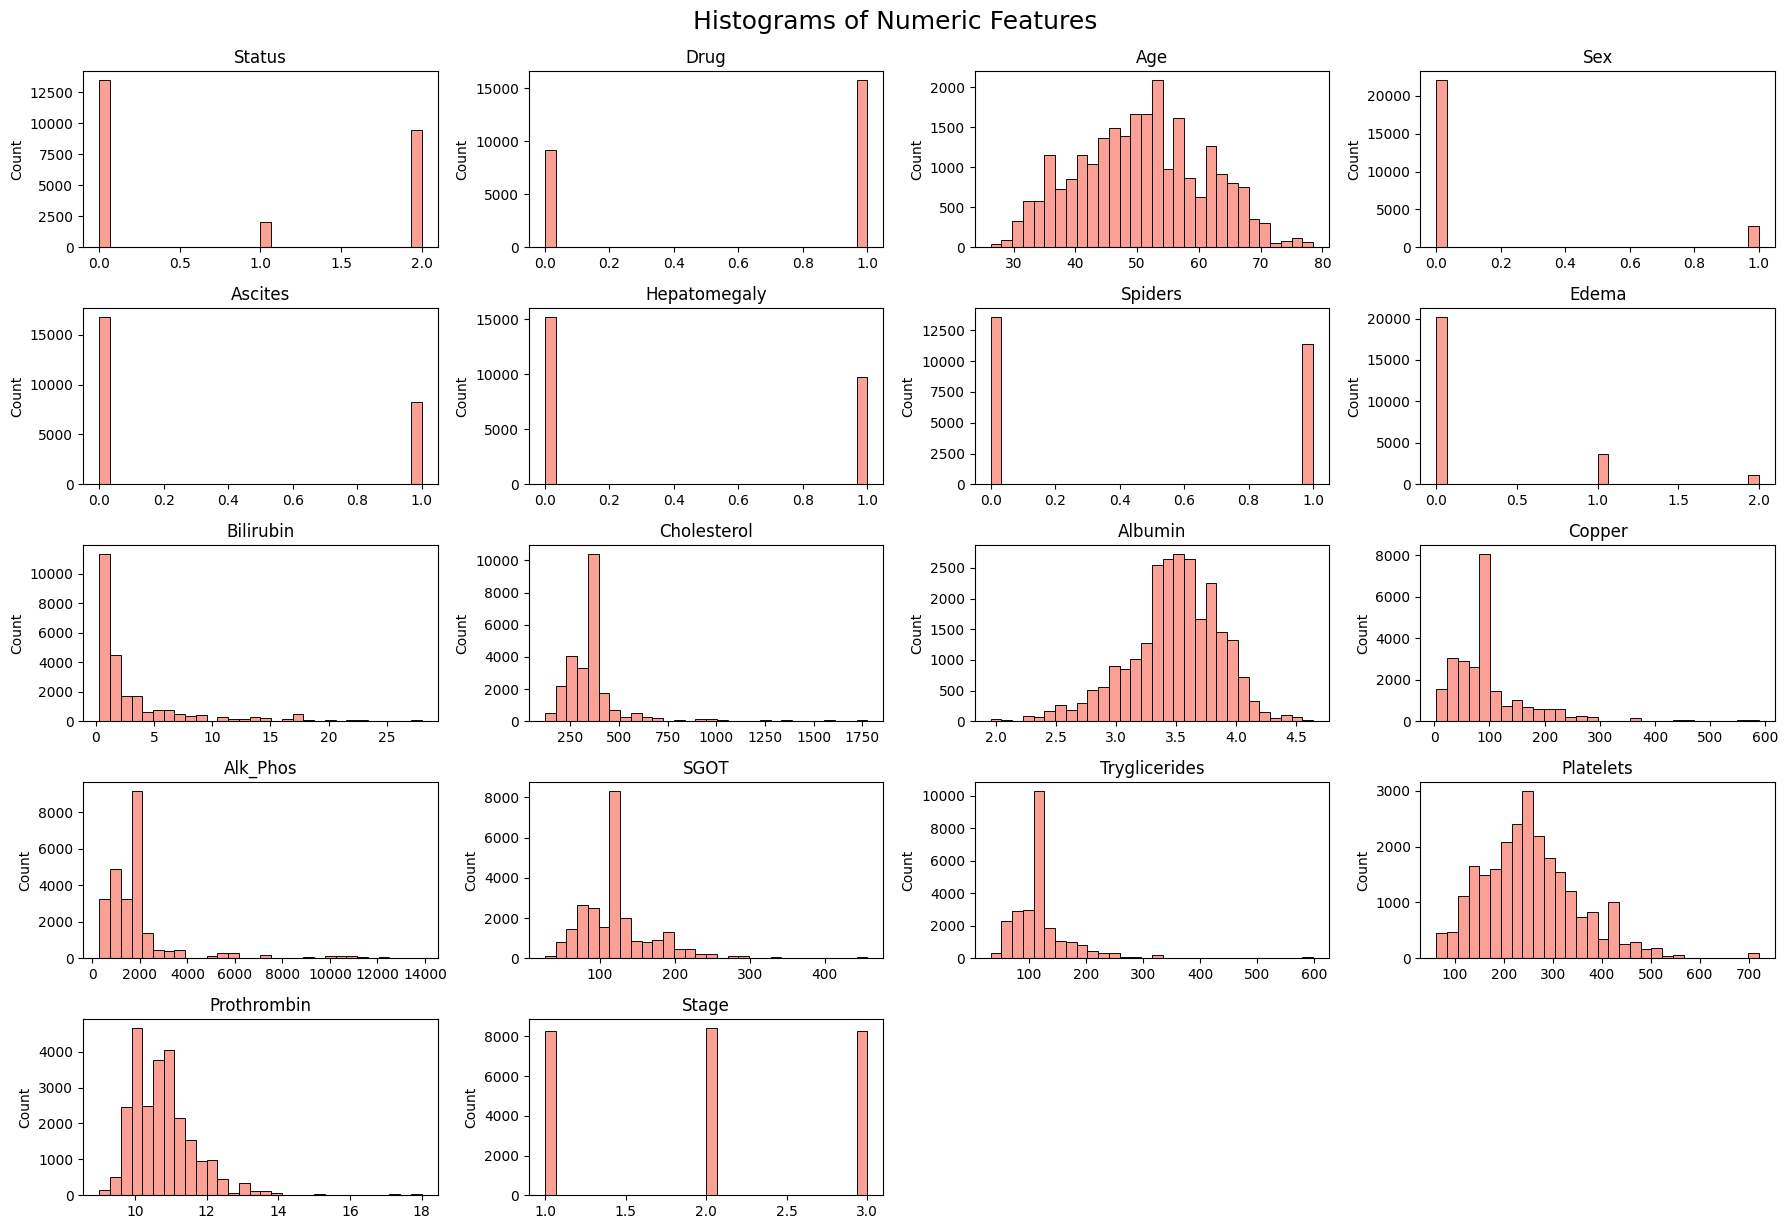

In [14]:
numeric_columns = df.select_dtypes(include='number').columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) - 1) // 4 + 1, 4, i)
    sns.histplot(df[col], bins=30, color='salmon', edgecolor='black')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.suptitle("Histograms of Numeric Features", fontsize=18, y=1.02)
plt.show()

In [15]:
#Recode Target Variable (Stage)
df['Stage'] = df['Stage'].replace({1:0,2:1,3:2})

In [16]:
df

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,50.682192,0,0,1,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,0
1,0,1,54.038356,1,1,0,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,1
2,0,1,32.435616,0,0,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,1
3,2,1,45.115068,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,1
4,2,1,59.449315,0,0,1,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2,0,64.690411,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24996,2,0,64.690411,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24997,2,0,45.852055,0,0,1,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,2
24998,0,0,46.547945,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,1


In [17]:
df['Stage']

0        0
1        1
2        1
3        1
4        0
        ..
24995    1
24996    1
24997    2
24998    1
24999    1
Name: Stage, Length: 25000, dtype: int64

<Axes: >

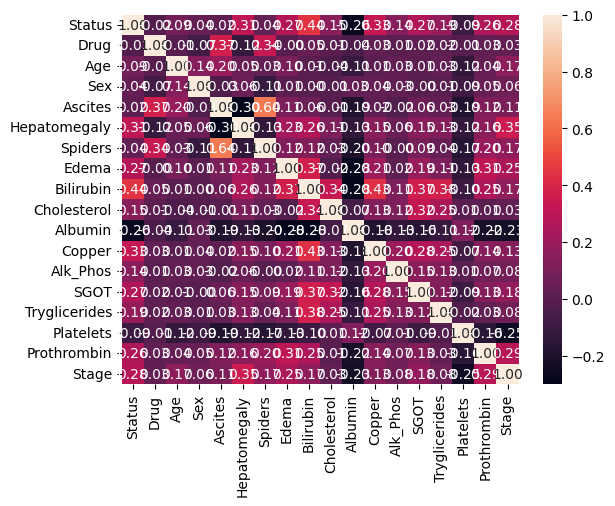

In [18]:
#Exploratory Data Analysis
sns.countplot(x='Status', data=df)
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [19]:
# Feature and Target Split
X = df.drop(columns=['Status'])
y = df['Status']


In [20]:
#Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
#Train Multiple Models
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Performance")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance
[[2381    1  321]
 [ 212   18  176]
 [ 770    7 1114]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      2703
           1       0.69      0.04      0.08       406
           2       0.69      0.59      0.64      1891

    accuracy                           0.70      5000
   macro avg       0.70      0.50      0.50      5000
weighted avg       0.70      0.70      0.67      5000



In [23]:
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Performance")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance
[[2690    2   11]
 [  14  383    9]
 [  28    0 1863]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2703
           1       0.99      0.94      0.97       406
           2       0.99      0.99      0.99      1891

    accuracy                           0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000



In [24]:
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Performance")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\sakshi\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:54:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance
[[2692    2    9]
 [   9  391    6]
 [  22    0 1869]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2703
           1       0.99      0.96      0.98       406
           2       0.99      0.99      0.99      1891

    accuracy                           0.99      5000
   macro avg       0.99      0.98      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [25]:
svm_clf = SVC(class_weight='balanced', kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("SVM Performance")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance
[[2193  198  312]
 [  81  256   69]
 [ 535  320 1036]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2703
           1       0.33      0.63      0.43       406
           2       0.73      0.55      0.63      1891

    accuracy                           0.70      5000
   macro avg       0.61      0.66      0.62      5000
weighted avg       0.73      0.70      0.70      5000



In [26]:
#Evaluate Model Performance
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_log_reg, y_pred_rf, y_pred_xgb, y_pred_svm]

for model, pred in zip(models, predictions):
    print(f"\n{model} Classification Report:")
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      2703
           1       0.69      0.04      0.08       406
           2       0.69      0.59      0.64      1891

    accuracy                           0.70      5000
   macro avg       0.70      0.50      0.50      5000
weighted avg       0.70      0.70      0.67      5000

[[2381    1  321]
 [ 212   18  176]
 [ 770    7 1114]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2703
           1       0.99      0.94      0.97       406
           2       0.99      0.99      0.99      1891

    accuracy                           0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000

[[2690    2   11]
 [  14  383    9]
 [  28    0 1863]]

XGBoost Classification Report:
              

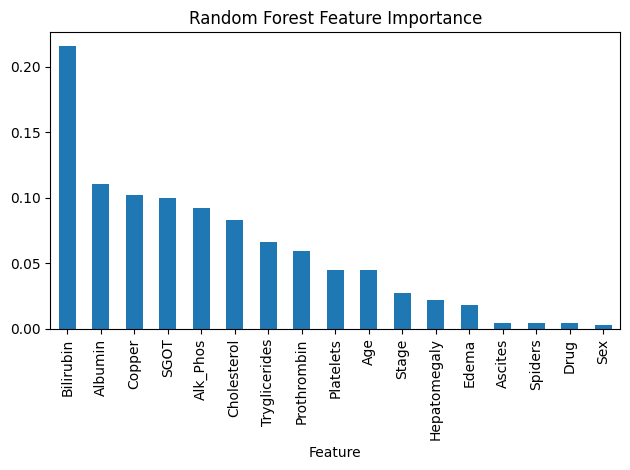

In [27]:
#Feature Importance
importances_rf = rf_clf.feature_importances_
feat_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})
feat_df_rf = feat_df_rf.sort_values(by='Importance', ascending=False)
feat_df_rf.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


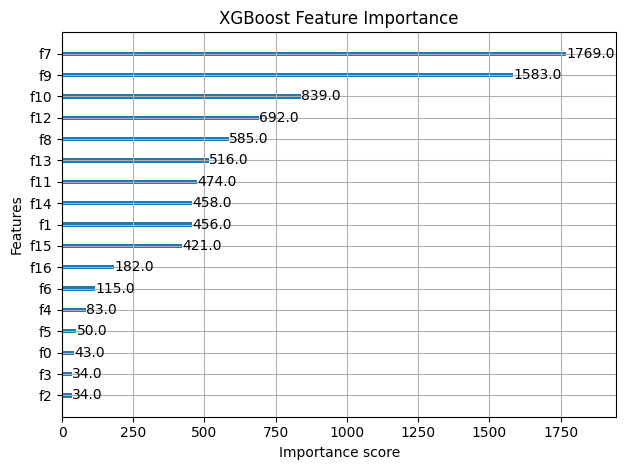

In [28]:
xgb.plot_importance(xgb_clf)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [29]:
#Save Best Model
import pickle

In [30]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

In [31]:
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)


In [32]:
#Cross-Validation
from sklearn.model_selection import cross_val_score


In [33]:
log_reg_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_clf, X_scaled, y, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(xgb_clf, X_scaled, y, cv=5, scoring='accuracy')
svm_scores = cross_val_score(svm_clf, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy: ", log_reg_scores.mean())
print("Random Forest CV Accuracy: ", rf_scores.mean())
print("XGBoost CV Accuracy: ", xgb_scores.mean())
print("SVM CV Accuracy: ", svm_scores.mean())

C:\Users\sakshi\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:59:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sakshi\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:59:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sakshi\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:59:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sakshi\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:59:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\lear

Logistic Regression CV Accuracy:  0.69892
Random Forest CV Accuracy:  0.98612
XGBoost CV Accuracy:  0.99024
SVM CV Accuracy:  0.6759600000000001


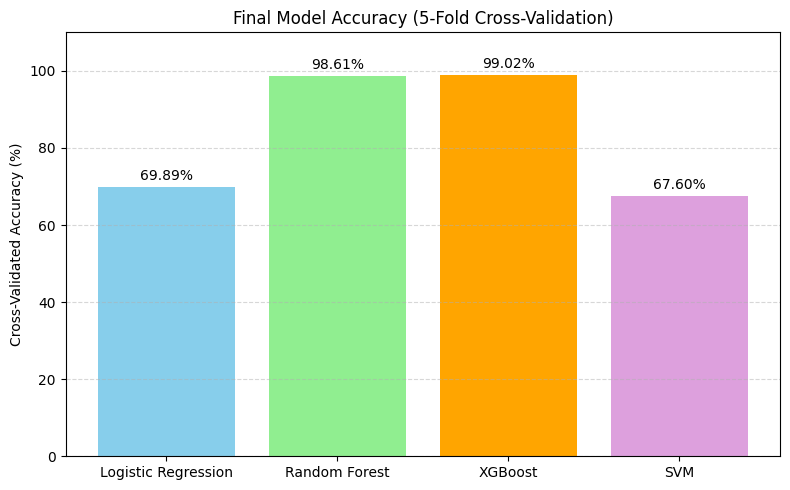

In [34]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
cv_accuracies = [
    log_reg_scores.mean()*100,
    rf_scores.mean()*100,
    xgb_scores.mean()*100,
    svm_scores.mean()*100
]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, cv_accuracies, color=['skyblue', 'lightgreen', 'orange', 'plum'])

for bar, acc in zip(bars, cv_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{acc:.2f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.ylabel('Cross-Validated Accuracy (%)')
plt.title('Final Model Accuracy (5-Fold Cross-Validation)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()